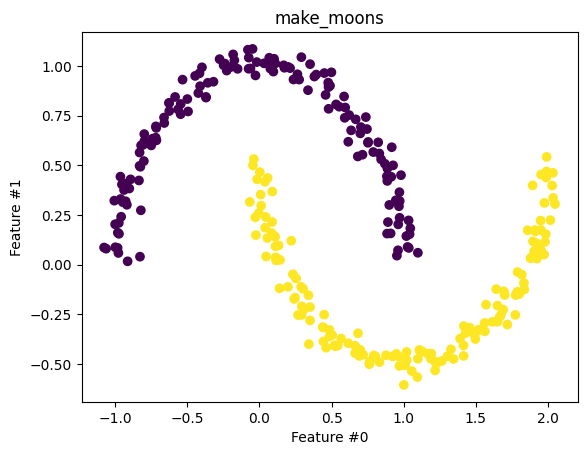

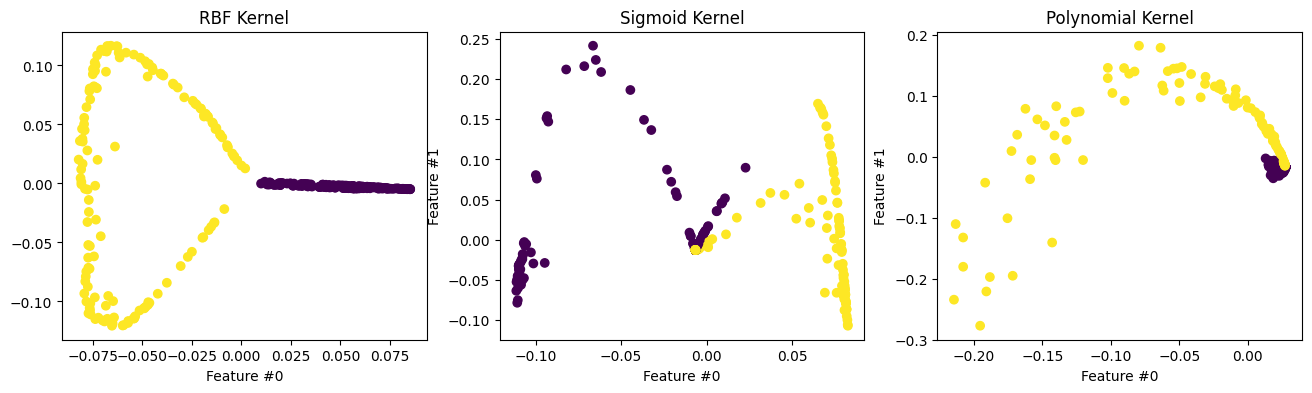

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

#Данные
X, y = make_moons(n_samples=300, noise=0.05, random_state=None)


#Ядра


class K_PCA:
    def __init__(self, X):
        self.X = X

    @staticmethod
    def polynomial_kernel(X1, X2, d = 2, coef=1):
        dot_product_matrix = np.dot(X1, X2.T)
        kernel_matrix = (dot_product_matrix + coef) ** d

        return kernel_matrix

    @staticmethod
    def rbf_kernel(X1, X2, gamma=0.2):
        Euclid_norm = np.sum(X1 ** 2, axis=1, keepdims=True) + np.sum(X2 ** 2, axis=1) - 2 * np.dot(X1, X2.T)

        return np.exp(-gamma * Euclid_norm)

    @staticmethod
    def sigmoid_kernel(X1, X2, gamma = 0.2, coef=1):
        dot_product_matrix = np.dot(X1, X2.T)
        kernel_matrix = np.tanh(gamma * dot_product_matrix + coef)

        return kernel_matrix

    def Kernel_PCA(self, kernel = "rbf", gamma = 0.2, d = 2, coef = 1):
        if kernel == "rbf":
            kernel_matrix = self.rbf_kernel(self.X, self.X, gamma)
        if kernel == "poly":
            kernel_matrix = self.polynomial_kernel(self.X, self.X, d, coef)
        if kernel == "sigmoid":
            kernel_matrix = self.sigmoid_kernel(self.X, self.X, gamma, coef)

        #Центрирование
        n_samples = X.shape[0]
        one_n = np.ones((n_samples, n_samples)) / n_samples
        K_centered = kernel_matrix - one_n.dot(kernel_matrix) - kernel_matrix.dot(one_n) + one_n.dot(kernel_matrix).dot(one_n)

        ###########################################################спектральное разложение нужно заменить на наше
        eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
        eigenvalue_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[eigenvalue_indices]
        eigenvectors = eigenvectors[:, eigenvalue_indices]
        ######################################################3
        self.U = eigenvectors
        self.S = eigenvalues
        return eigenvectors, eigenvalues





# Главные компоненты
k = 2
kpca = K_PCA(X)
U_rbf, S_rbf = kpca.Kernel_PCA("rbf", 15)
X_rbf = U_rbf[:, :k]

U_poly, S_poly = kpca.Kernel_PCA("poly", d = 6, coef = 1)
X_poly = U_poly[:, :k]

U_sigmoid, S_sigmoid = kpca.Kernel_PCA("sigmoid", 10, coef = 10)
X_sigmoid = U_sigmoid[:, :k]

# Визуализация

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.ylabel("Feature #1")
plt.xlabel("Feature #0")
plt.title("make_moons")
plt.show()


_, (rbf_kernel, poly_kernel, sigmoid_kernel) = plt.subplots(ncols=3, figsize=(16, 4))


sigmoid_kernel.scatter(X_poly[:, 0], X_poly[:, 1], c=y)
sigmoid_kernel.set_ylabel("Feature #1")
sigmoid_kernel.set_xlabel("Feature #0")
sigmoid_kernel.set_title("Polynomial Kernel")

poly_kernel.scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c=y)
poly_kernel.set_ylabel("Feature #1")
poly_kernel.set_xlabel("Feature #0")
poly_kernel.set_title("Sigmoid Kernel")

rbf_kernel.scatter(X_rbf[:, 0], X_rbf[:, 1], c=y)
rbf_kernel.set_xlabel("Feature #0")
_ = rbf_kernel.set_title("RBF Kernel")
plt.show()


